This notebook presents initial data preprocessing. Link to the dataset: https://www.kaggle.com/rajyellow46/wine-quality

## 1. Libraries

In [1]:
import glob
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn. preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

## 2. Reading data

### 2.1 Function:

In [2]:
def read_data(path):                
    directory = path + 'winequalityN.csv'
    dataset = pd.read_csv(directory)
    return dataset

### 2.2 Application:

In [3]:
wine_data = read_data('/Users/aleksandra/Desktop/Python_bootcamp/')
wine_data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Explantion for the features:

-**fixed acidity**: most acids involved with wine or fixed or nonvolatile (do not evaporate readily).

-**volatile acidity**: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste.

-**citric acid**: found in small quantities, citric acid can add 'freshness' and flavor to wines.

-**residual sugar**: the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet

-**chlorides**: the amount of salt in the wine.

-**free sulfur dioxide**: the free form of  𝑆𝑂2 exists in equilibrium between molecular  𝑆𝑂2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine.

-**total sulfur dioxide**: amount of free and bound forms of  𝑆𝑂2; in low concentrations,  𝑆𝑂2 is mostly undetectable in wine, but at free  𝑆𝑂2 concentrations over 50 ppm,  𝑆𝑂2 becomes evident in the nose and taste of wine.

-**density**: the density of water is close to that of water depending on the percent alcohol and sugar content.

-**pH**: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale.

-**sulphates**: a wine additive which can contribute to sulfur dioxide gas (𝑆𝑂2) levels, wich acts as an antimicrobial and antioxidant.

-**alcohol**: the percent alcohol content of the wine.

-**quality**: score between 0 and 10.

-**type**: red/white.

## 3. Exploring dataset features

Descriptive statistics

In [4]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Identifying missing values

In [5]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


Identifying missing values in each column

In [6]:
wine_data.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

As we see from the above, we have only few missing values therefore we will drop them.

In [7]:
wine_data.dropna(inplace=True)
wine_data.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

We will check if we have any duplicated rows in the dataset which may indicate on the same wine. It is crucial to remove duplicates otherwise our model would learn from this duplicated data and we would get very high accuracy on in-sample testing but out of sample testing will be much less what will result in overfitting.

In [8]:
wine_data.duplicated().sum()

1168

We have 1168 duplicated rows in our dataset. We will drop them out of our dataset.

In [9]:
wine_data.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=False)
wine_data.duplicated().sum()

0

In [10]:
wine_data.shape

(5295, 13)

Intially we had 6,497 rows and by dropping duplicates we received 5,295 rows.


# 4. Scaling data

### 4.1 Scaling:

In [11]:
def scaling(dataframe, features_to_scale):
    ss = StandardScaler()
    dataframe[features_to_scale] = ss.fit_transform(dataframe[features_to_scale])
    return dataframe.head()

### 4.2 Application:

Since the range of values of our dataset varies significantly, we will apply StandardScaler to mitigate this issue. We will not scale 'type' variable which is categorical.

In [12]:
scaling(wine_data, ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 
            'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 
            'pH', 'sulphates', 'alcohol'])

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,-0.165087,-0.440021,0.280208,3.477382,-0.316815,0.838865,0.984149,2.177419,-1.401186,-0.555267,-1.475154,6
1,white,-0.695163,-0.261684,0.144245,-0.766859,-0.208407,-0.900220,0.314921,-0.180598,0.472180,-0.288309,-0.885144,6
2,white,0.667890,-0.380575,0.552136,0.410863,-0.181305,-0.002628,-0.301474,0.189947,0.222398,-0.622007,-0.379421,6
3,white,-0.013636,-0.677803,0.008281,0.766401,0.035512,0.951064,1.265929,0.358377,-0.214721,-0.888964,-0.547996,6
6,white,-0.770888,-0.142793,-1.079428,0.433084,-0.316815,-0.002628,0.385366,0.122576,-0.277166,-0.421788,-0.800857,6


## 5. Dataset distribution

### 5.1 Function:

In [13]:
def show_boxplot(dataframe):
    sns.set()
    plt.figure(figsize=(30,15))
    sns.boxplot(data=dataframe)
    plt.show()

### 5.2 Application: 

Firstly we will check for outliers in our dataset.

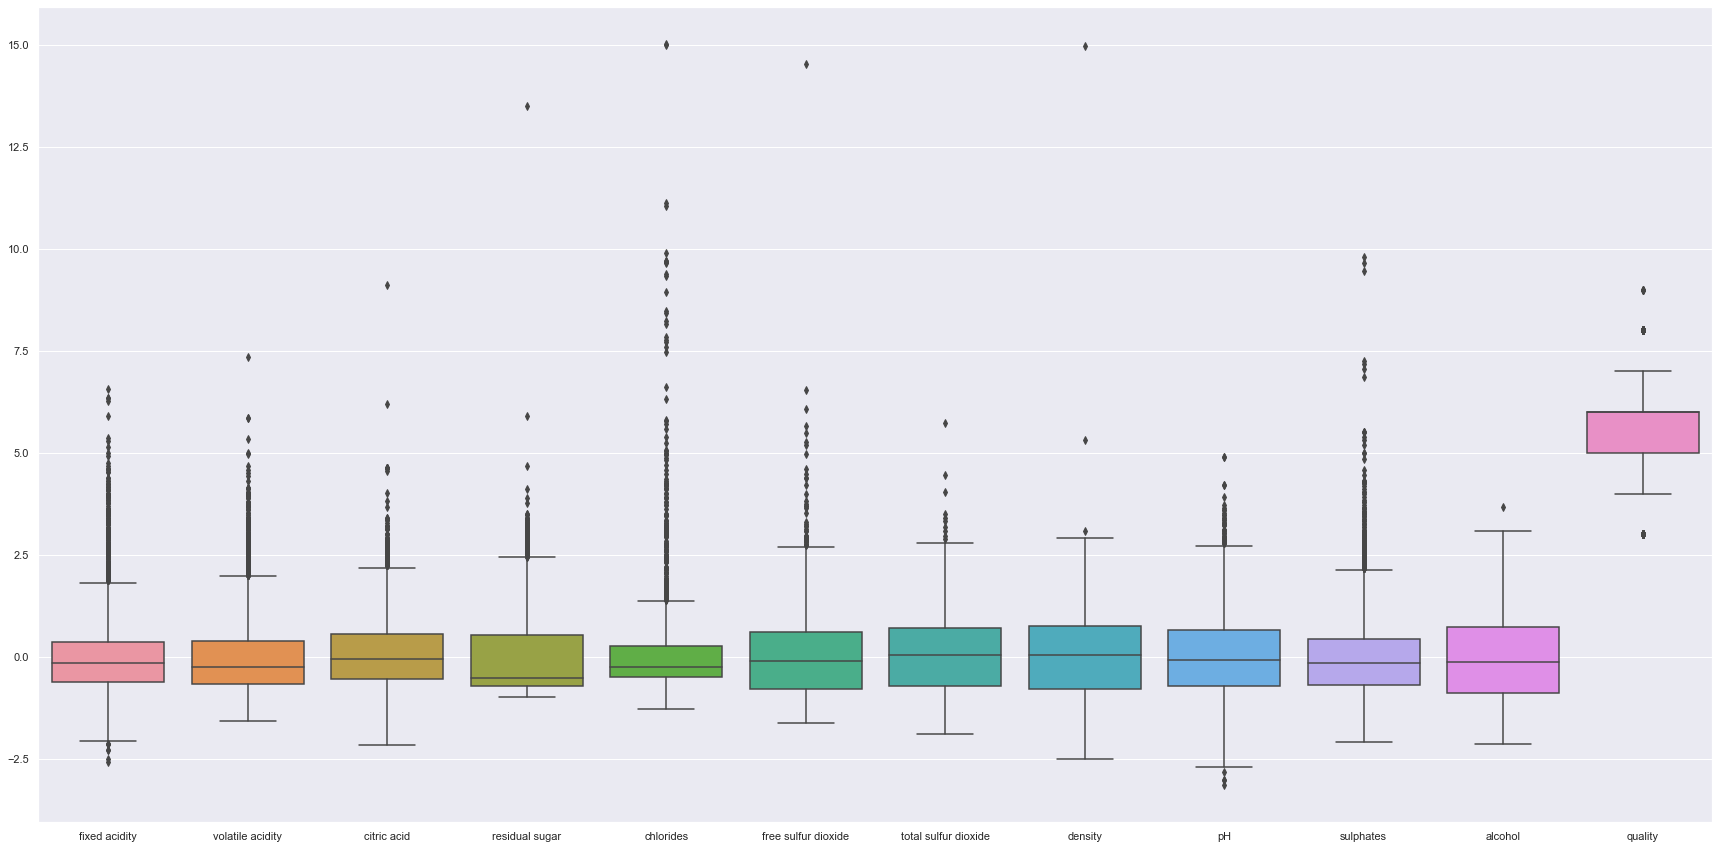

In [14]:
show_boxplot(wine_data)

We can see from the graph above that 3 variables have significantly higher standard deviation than the rest. We will look into them more.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/pyt

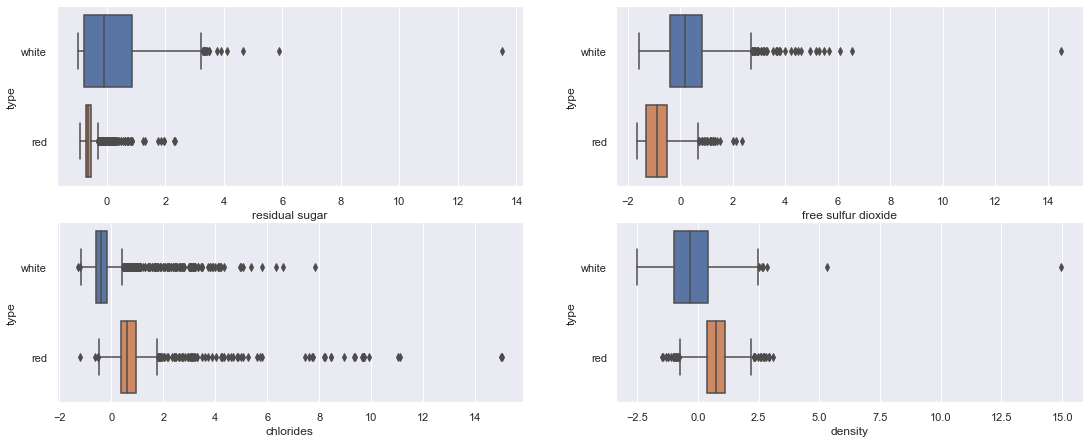

In [15]:
fig, ax =plt.subplots(2,2)
plt.subplots_adjust(right=2.5, top=1.5)
sns.boxplot(wine_data['residual sugar'], wine_data['type'], ax=ax[0][0])
sns.boxplot(wine_data['free sulfur dioxide'], wine_data['type'], ax=ax[0][1])
sns.boxplot(wine_data['chlorides'], wine_data['type'], ax=ax[1][0])
sns.boxplot(wine_data['density'], wine_data['type'], ax=ax[1][1])
plt.show()

We will remove outliers that are 3 standard deviations from the mean for these 3 variables.

In [16]:
lower1 = wine_data['residual sugar'].mean()-3*wine_data['residual sugar'].std()
upper1 = wine_data['residual sugar'].mean()+3*wine_data['residual sugar'].std()
wine_data = wine_data[(wine_data['residual sugar']>lower1) & (wine_data['residual sugar']<upper1)]

lower2 = wine_data['free sulfur dioxide'].mean()-3*wine_data['free sulfur dioxide'].std()
upper2 = wine_data['free sulfur dioxide'].mean()+3*wine_data['free sulfur dioxide'].std()
wine_data = wine_data[(wine_data['free sulfur dioxide']>lower2) & (wine_data['free sulfur dioxide']<upper2)]

lower3 = wine_data['chlorides'].mean()-3*wine_data['chlorides'].std()
upper3 = wine_data['chlorides'].mean()+3*wine_data['chlorides'].std()
wine_data = wine_data[(wine_data['chlorides']>lower3) & (wine_data['chlorides']<upper3)]

lower4 = wine_data['density'].mean()-3*wine_data['density'].std()
upper4 = wine_data['density'].mean()+3*wine_data['density'].std()
wine_data = wine_data[(wine_data['density']>lower4) & (wine_data['density']<upper4)]

In [17]:
wine_data.shape

(5133, 13)

Previously we had 5295 so we removed 162 rows.

Secondly, we will check how many samples of red and white wine we have in our dataset.

In [19]:
wine_data["type"].value_counts()

white    3833
red      1300
Name: type, dtype: int64

Thirdly, we will check how wine quality depends on type of wine.

In [20]:
red_per_quality = wine_data.loc[wine_data["type"]=='red']["quality"].value_counts() 
white_per_quality = wine_data.loc[wine_data["type"]=='white']["quality"].value_counts()
quality_table = pd.DataFrame({
    'red': red_per_quality,
    'white':white_per_quality,})
quality_table.fillna(value = 0, inplace=True)
quality_table['total_sum'] = quality_table.sum(axis=1)
quality_table

,red,white,total_sum
3,8.0,15,23.0
4,50.0,149,199.0
5,551.0,1121,1672.0
6,510.0,1734,2244.0
7,164.0,680,844.0
8,17.0,129,146.0
9,0.0,5,5.0


We see from the above that we have imbalanced dataset. Class 5 and 6 dominate whereas rest of the classes are undersampled.

## 6. Encoding categorical data

### 6.1 Function:

In [21]:
def onehot_encoder(dataframe, column):
    le = LabelEncoder()
    dataframe[column]= le.fit_transform(dataframe[column])
    return dataframe

### 6.2 Application:

We have categorical variable 'type' that we will change to numerical value: 1 for white, 0 for red.

In [22]:
onehot_encoder(wine_data, 'type')

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,1,-0.695163,-0.261684,0.144245,-0.766859,-0.208407,-0.900220,0.314921,-0.180598,0.472180,-0.288309,-0.885144,6
2,1,0.667890,-0.380575,0.552136,0.410863,-0.181305,-0.002628,-0.301474,0.189947,0.222398,-0.622007,-0.379421,6
3,1,-0.013636,-0.677803,0.008281,0.766401,0.035512,0.951064,1.265929,0.358377,-0.214721,-0.888964,-0.547996,6
6,1,-0.770888,-0.142793,-1.079428,0.433084,-0.316815,-0.002628,0.385366,0.122576,-0.277166,-0.421788,-0.800857,6
9,1,0.667890,-0.737249,0.756081,-0.789080,-0.343917,-0.114827,0.262087,-0.247970,-0.027384,-0.555267,0.379162,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6490,0,-0.695163,0.986673,-1.283374,-0.611310,0.523349,-0.058727,-1.305316,0.405538,1.221527,1.446916,0.379162,6
6491,0,-0.316537,1.640575,-1.623283,-0.700195,0.306532,-0.114827,-1.340539,0.664919,1.221527,1.914092,-0.885144,6
6492,0,-0.770888,1.521684,-1.623283,-0.677974,0.902778,0.109572,-1.234871,0.122576,1.408863,0.312346,-0.042273,5
6495,0,-0.998063,1.789189,-1.351356,-0.677974,0.496247,0.109572,-1.234871,0.314585,2.158210,1.179958,-0.295134,5


## 7. Categorising target variable

Since we're predicting the target variable quality, we will have to categorise the numbers into low, medium and high and then encode it to 0,1 and 2 for classification. This will reduce number of classes and allow for more efficient model training.

In [23]:
wine_data['quality']=wine_data['quality'].map({3:'low', 
                                               4:'low', 
                                               5:'medium', 
                                               6:'medium', 
                                               7:'medium', 
                                               8:'high', 
                                               9:'high'})

wine_data['quality']=wine_data['quality'].map({'low':0,'medium':1,'high':2})


After preprocessing is done, let's move to Classification_Models notebook where we start learning machine learning models on our preprocessed dataset. Let's save the cleaned dataset and load it in a new notebook.

In [24]:
wine_data.to_csv("cleaned_wine_data")